**OBJECTIVE**: In this Project we are going to create and train 2 pest detection models ( A CNN from scratch and a Finetuned Resnet-50 model), these models should be able to identify the following pests from images:

Ants, Bees, Beetles, Caterpillars, Earthworms, Earwigs, Grasshoppers, Moths, Slugs, Snails, Wasps, and Weevils.

**WORKFLOW:**To accomplish the above objectives, we nee to perform the following

1. Imports: Libraries, Frameworks and Setting Seed
2. Data Extraction: Unzipping the Data
3. Data Loading: Loading into memory  and image Preprocessing
4. Data Visualization: Vewing Image per class
5. Data Augmentation: Resample Images while varying properties to create a robust train set
6. Modelling: Model Creation Initialization and Loading
7. Modelling: Training The Model
8. Modelling: Model Evaluation [FIRST FOR CNN, THEN REPEAT 5 -8 FOR RESNET PRETRAINED MODEL]
9. Concluson: Selection and Saving the model

In [ ]:
# IMPORT NECESSARY LIBRARIES
# TensorFlow is an open-source deep learning library used for building and training neural networks.
import tensorflow as tf  # Deep learning library for building neural networks
import numpy as np  # Numerical computing library
# Random is used to generate random numbers, which can be useful for randomization in data splitting or augmentation.
import random  # Used for generating random values
import pandas as pd  # Library for handling tabular data

# DATA EXTRACTION
import zipfile  # Used for extracting ZIP files

# DATA LOADING
import os  # Allows interaction with the operating system

# DATA VISUALIZATION
import matplotlib.pyplot as plt  # Library for plotting data
import seaborn as sns  # Statistical data visualization library

# DATA AUGMENTATION AND/OR MODELING (TensorFlow Libraries)
# Function to load an image
from tensorflow.keras.preprocessing.image import load_img

# Splitting dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Data augmentation (image transformations)
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomContrast

# Creating a sequential neural network model
from tensorflow.keras.models import Sequential

# Core Keras layers and models
from tensorflow import keras
from tensorflow.keras import layers, models

# Generate augmented data from images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Dense and dropout layers for deep learning models
from tensorflow.keras.layers import Dense, Dropout

# Callbacks for early stopping, checkpoint saving, etc.
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint

# Optimizer for training the model
from tensorflow.keras.optimizers import Adam

# Pre-trained neural network architectures (MobileNetV2, VGG16) for transfer learning
from tensorflow.keras.applications import MobileNetV2, VGG16

# Create custom deep learning models
from tensorflow.keras import Model


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#DATA EXTRACTION
#lets unzip the file containing aour training images

#unzip the data
ZIPPED_DATA_PATH = "/content/agricultural-pests-image-dataset.zip"

# Specify the directory where you want to extract the contents

DATA_PATH = "/content/agricultural-pests-image-datasets"

In [ ]:
# Open the ZIP file
with zipfile.ZipFile(ZIPPED_DATA_PATH, 'r') as zip_ref:
    # Extract all the contents to the specified directory
    zip_ref.extractall(DATA_PATH)

# After this code executes, the contents of the ZIP file will be extracted to 'extracted_dir'


In [ ]:
##setting seeds for reproducibility
# Seed Everything so that if we run this again, we get the exact same result

def seed_everything(seed=42):
    """
    This function ensures that randomness in the processes across multiple libraries
    (TensorFlow, NumPy, and Python's random module) is reproducible.

    Args:
        seed (int): The seed value to set for reproducibility. Default is 42.
    """

    # Set the seed for TensorFlow's random number generator
    tf.random.set_seed(seed)

    # Set the seed for NumPy's random number generator
    np.random.seed(seed)

    # Set the seed for Python's built-in random module
    random.seed(seed)

    # Configure TensorFlow to use a single thread for execution.
    # Because multiple threads are a potential source of non-reproducible results.
    # This minimizes the effects of parallel execution, which can introduce randomness.
    session_conf = tf.compat.v1.ConfigProto(
        intra_op_parallelism_threads=1,  # Controls parallel execution within an operation
        inter_op_parallelism_threads=1   # Controls parallel execution between operations
    )

    # Set the random seed for TensorFlow v1 to ensure consistency in results
    tf.compat.v1.set_random_seed(seed)

    # Create a TensorFlow session with the specified configuration to enforce reproducibility
    sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)

    # Set the created session as the default session for Keras backend operations
    tf.compat.v1.keras.backend.set_session(sess)


In [ ]:
# DATA LOADING
# Let's count how many folders (directories) and images are in our dataset folder.

import os  # Importing the `os` module to handle file system operations.

def get_dataset_info(root_dir):
    """
    This function walks through the dataset's root directory and counts:
    - The number of subdirectories (folders)
    - The number of image files present in each subfolder

    Args:
        root_dir (str): The path to the dataset directory.

    Returns:
        None (prints out folder and image counts)
    """

    # Initialize counters for the number of directories and images
    dir_count = 0  # Counter for directories
    image_count = 0  # Counter for images

    # Walk through the root directory and its subdirectories
    for dirpath, dirnames, filenames in os.walk(root_dir):
        """
        - `dirpath` : The current directory path being processed.
        - `dirnames` : A list of subdirectories in the current directory.
        - `filenames` : A list of files (images in this case) in the current directory.
        """

        # Count the number of subdirectories in the current directory
        dir_count += len(dirnames)

        # Count the number of image files in the current directory
        image_count += len(filenames)

        # Print the number of directories and images found in the current directory
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath.split('/')[-1]}'.")

    # Print the total counts of directories and images in the entire dataset
    print(f"Total: {dir_count} directories and {image_count} images in '{root_dir}'.")

# Call the function to get dataset information using the specified dataset path
get_dataset_info(DATA_PATH)


There are 12 directories and 0 images in 'agricultural-pests-image-datasets'.
There are 0 directories and 499 images in 'ants'.
There are 0 directories and 485 images in 'weevil'.
There are 0 directories and 466 images in 'earwig'.
There are 0 directories and 485 images in 'grasshopper'.
There are 0 directories and 434 images in 'catterpillar'.
There are 0 directories and 500 images in 'bees'.
There are 0 directories and 497 images in 'moth'.
There are 0 directories and 323 images in 'earthworms'.
There are 0 directories and 416 images in 'beetle'.
There are 0 directories and 500 images in 'snail'.
There are 0 directories and 498 images in 'wasp'.
There are 0 directories and 391 images in 'slug'.
Total: 12 directories and 5494 images in '/content/agricultural-pests-image-datasets'.


In [ ]:
# DATA SELECTION

# First, let's create a DataFrame containing image file paths and their corresponding labels (pest categories).
# This will help in organizing and processing the dataset efficiently.

import os  # Importing `os` module to handle file system operations
import pandas as pd  # Importing `pandas` for creating and managing the DataFrame

# Initialize empty lists to store image file paths and their respective labels
image_paths = []  # Stores full file paths of images
labels = []  # Stores corresponding pest category (folder name)

# Loop through each pest subfolder in the dataset directory
for folder_name in os.listdir(DATA_PATH):
    folder_path = os.path.join(DATA_PATH, folder_name)  # Construct the full path of the folder

    # Check if the current item is a directory (i.e., a pest category folder)
    if os.path.isdir(folder_path):
        # Get a list of all image files in the current pest subfolder
        images = [img for img in os.listdir(folder_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]

        # Loop through each image in the current subfolder
        for image_name in images:
            image_path = os.path.join(folder_path, image_name)  # Construct full file path of the image
            image_paths.append(image_path)  # Append image path to the list
            labels.append(folder_name)  # Append folder name as the label

# Create a dictionary to store the collected data
data = {
    'image_path': image_paths,  # Image file paths
    'label': labels  # Corresponding labels (pest category)
}

# Convert the dictionary into a pandas DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame to verify the structure
print(df)


                                             image_path label
0     /content/agricultural-pests-image-datasets/ant...  ants
1     /content/agricultural-pests-image-datasets/ant...  ants
2     /content/agricultural-pests-image-datasets/ant...  ants
3     /content/agricultural-pests-image-datasets/ant...  ants
4     /content/agricultural-pests-image-datasets/ant...  ants
...                                                 ...   ...
5489  /content/agricultural-pests-image-datasets/slu...  slug
5490  /content/agricultural-pests-image-datasets/slu...  slug
5491  /content/agricultural-pests-image-datasets/slu...  slug
5492  /content/agricultural-pests-image-datasets/slu...  slug
5493  /content/agricultural-pests-image-datasets/slu...  slug

[5494 rows x 2 columns]


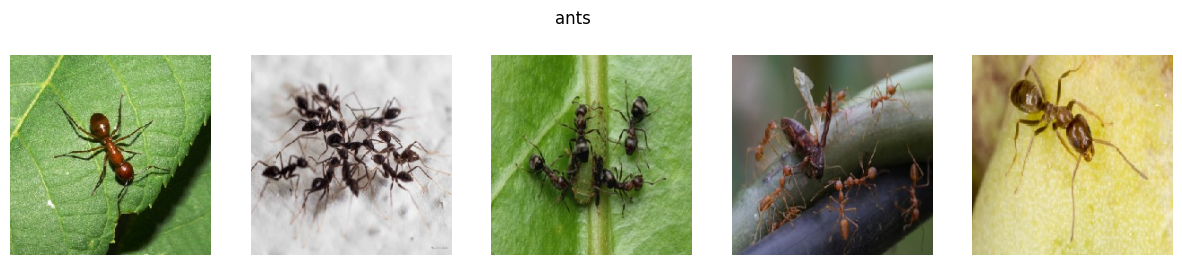

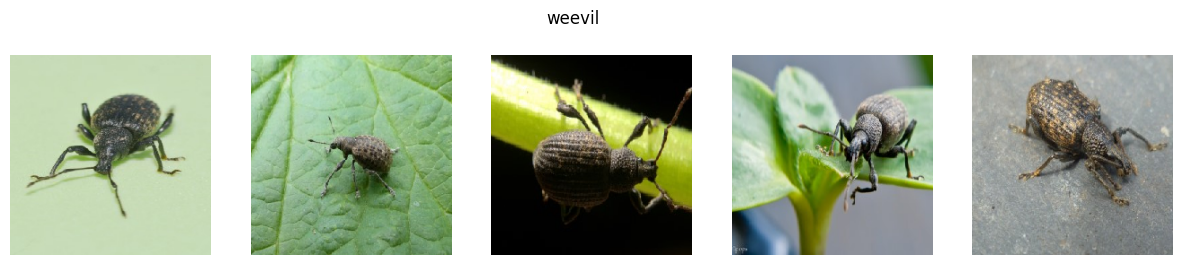

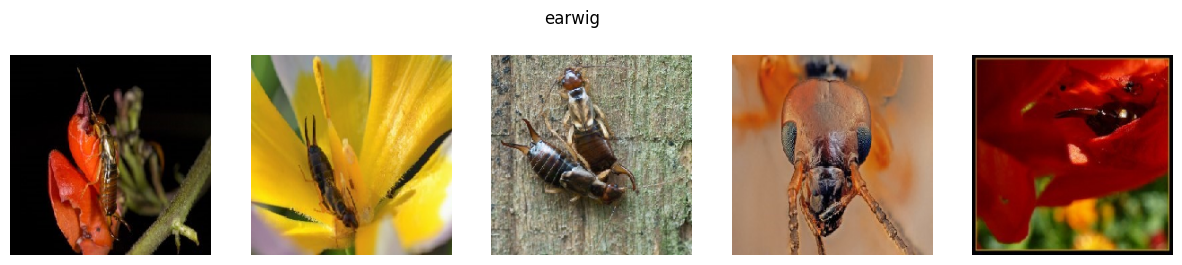

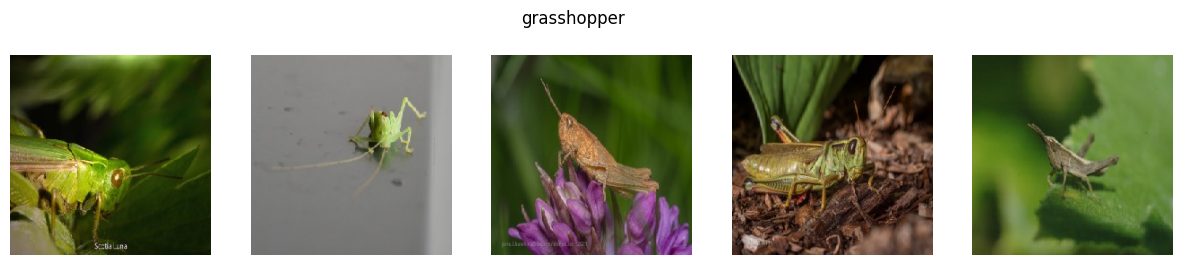

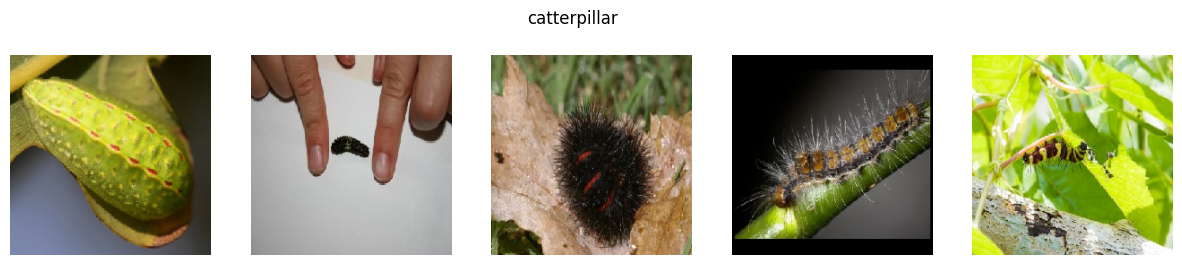

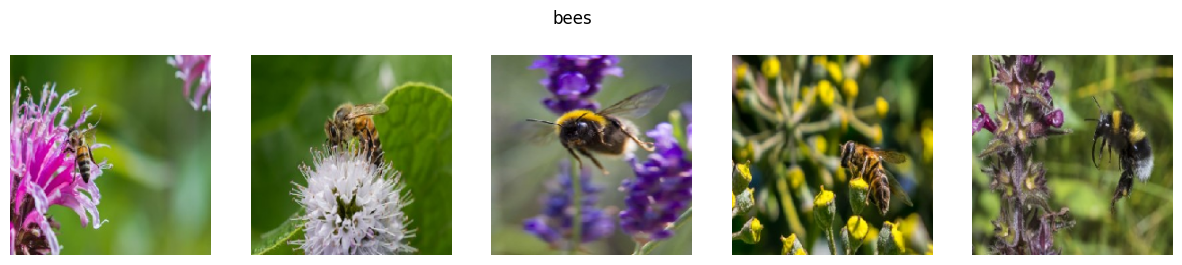

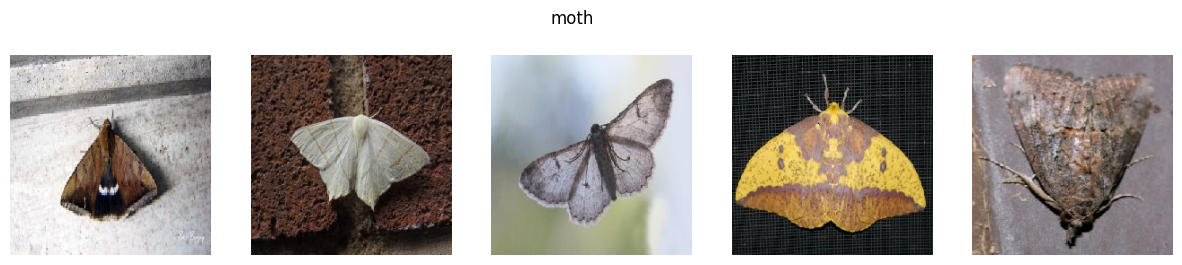

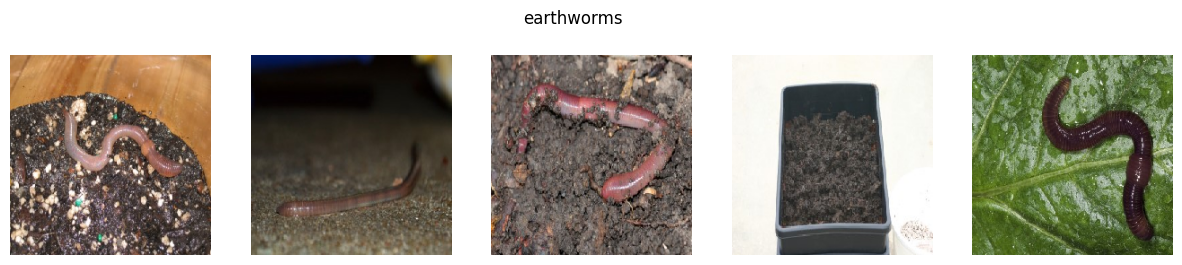

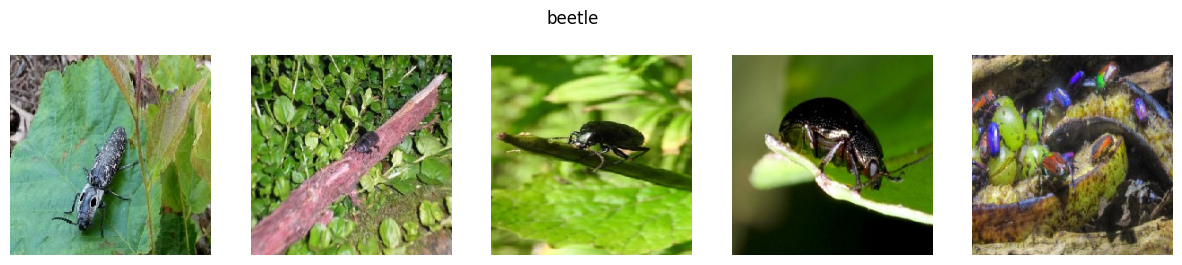

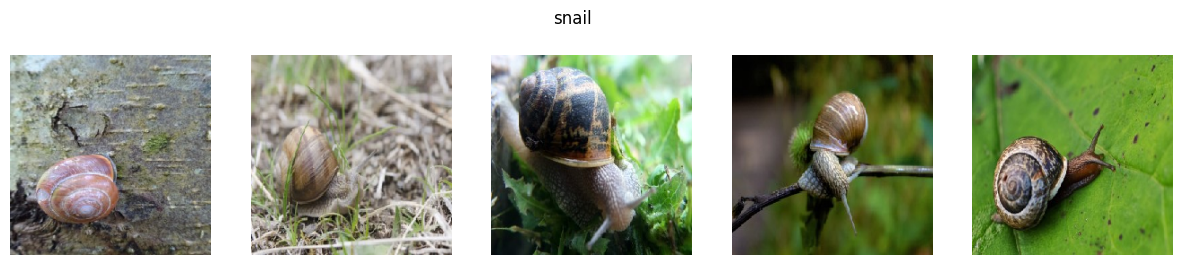

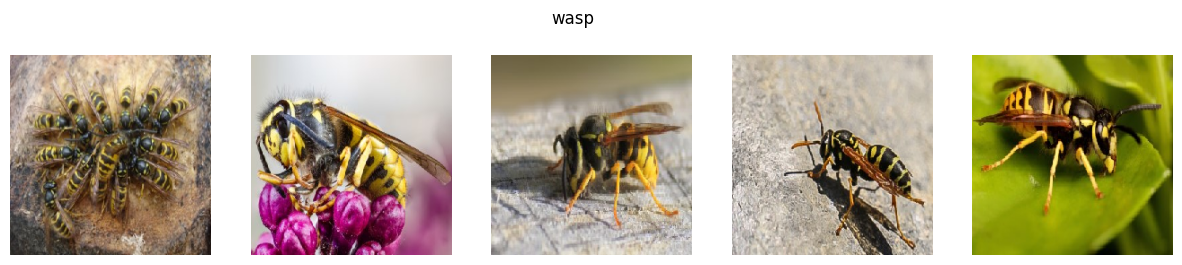

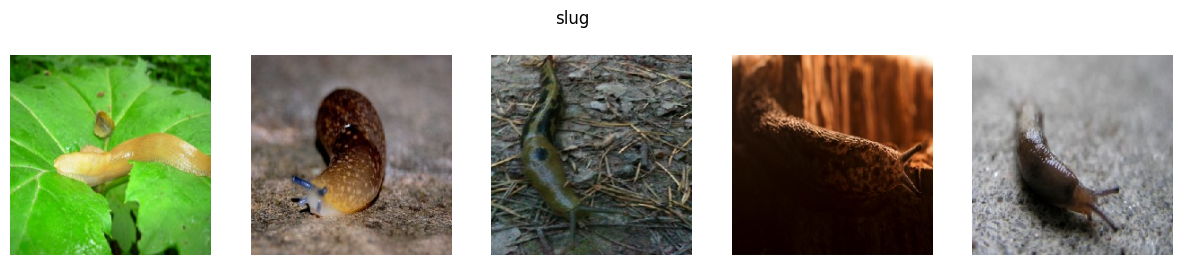

In [ ]:
import os  # Importing os for directory operations
import random  # Importing random to select random images
import matplotlib.pyplot as plt  # Importing matplotlib for image visualization
from tensorflow.keras.preprocessing.image import load_img  # Importing load_img to load images

# DATA VISUALIZATION
# Let's go ahead and display some example images from each pest category

# Loop through each pest subfolder in the dataset directory
for folder_name in os.listdir(DATA_PATH):
    folder_path = os.path.join(DATA_PATH, folder_name)  # Construct the full path of the folder

    # Check if the current item is a directory (i.e., a pest category folder)
    if os.path.isdir(folder_path):
        # Get a list of all image files in the current pest subfolder
        images = [img for img in os.listdir(folder_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]

        # Randomly select 5 images from the list (if there are at least 5 images)
        selected_images = random.sample(images, min(5, len(images)))

        # Create a figure with 1 row and 5 columns to display 5 images side by side
        fig, axes = plt.subplots(1, 5, figsize=(15, 3))
        fig.suptitle(folder_name)  # Set the title of the figure to the pest category name

        # Loop through the selected images and display them
        for i, image_name in enumerate(selected_images):
            image_path = os.path.join(folder_path, image_name)  # Construct the full file path of the image
            image = load_img(image_path, target_size=(224, 224))  # Load the image and resize it to (224, 224)

            axes[i].imshow(image)  # Display the image in the subplot
            axes[i].axis('off')  # Hide the axis for a cleaner visualization

        # Show the images for the current pest category
        plt.show()



In [ ]:
# This code is the same with the above code, but only difference is that I created a folder to save the output for easy download
import os  # Importing os for directory operations
import random  # Importing random to select random images
import matplotlib.pyplot as plt  # Importing matplotlib for image visualization
from tensorflow.keras.preprocessing.image import load_img  # Importing load_img to load images

# Define the path to your data.  You'll need to set this.
DATA_PATH = "/content/agricultural-pests-image-datasets"  #  <---  Make sure this is the correct path to your data

# Create an output folder if it doesn't exist
output_folder = "pest_image_output"
os.makedirs(output_folder, exist_ok=True)

# DATA VISUALIZATION
# Let's go ahead and display some example images from each pest category

# Loop through each pest subfolder in the dataset directory
for folder_name in os.listdir(DATA_PATH):
    folder_path = os.path.join(DATA_PATH, folder_name)  # Construct the full path of the folder

    # Check if the current item is a directory (i.e., a pest category folder)
    if os.path.isdir(folder_path):
        # Get a list of all image files in the current pest subfolder
        images = [img for img in os.listdir(folder_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]

        # Randomly select 5 images from the list (if there are at least 5 images)
        selected_images = random.sample(images, min(5, len(images)))

        # Create a figure with 1 row and 5 columns to display 5 images side by side
        fig, axes = plt.subplots(1, 5, figsize=(15, 3))
        fig.suptitle(folder_name)  # Set the title of the figure to the pest category name

        # Loop through the selected images and display them
        for i, image_name in enumerate(selected_images):
            image_path = os.path.join(folder_path, image_name)  # Construct the full file path of the image
            try:
                image = load_img(image_path, target_size=(224, 224))  # Load the image and resize it to (224, 224)
                axes[i].imshow(image)  # Display the image in the subplot
                axes[i].axis('off')  # Hide the axis for a cleaner visualization
            except FileNotFoundError:
                print(f"Error: Image file not found at {image_path}. Skipping.")
                continue

        # Save the figure to the output folder
        output_path = os.path.join(output_folder, f"{folder_name}_examples.png")
        plt.savefig(output_path)
        plt.close(fig)  # Close the figure to free up memory

        print(f"Saved plot for {folder_name} to {output_path}")

print(f"All plots saved to {output_folder}")


Saved plot for ants to pest_image_output/ants_examples.png
Saved plot for weevil to pest_image_output/weevil_examples.png
Saved plot for earwig to pest_image_output/earwig_examples.png
Saved plot for grasshopper to pest_image_output/grasshopper_examples.png
Saved plot for catterpillar to pest_image_output/catterpillar_examples.png
Saved plot for bees to pest_image_output/bees_examples.png
Saved plot for moth to pest_image_output/moth_examples.png
Saved plot for earthworms to pest_image_output/earthworms_examples.png
Saved plot for beetle to pest_image_output/beetle_examples.png
Saved plot for snail to pest_image_output/snail_examples.png
Saved plot for wasp to pest_image_output/wasp_examples.png
Saved plot for slug to pest_image_output/slug_examples.png
All plots saved to pest_image_output


In [ ]:
from google.colab import files
import os
import shutil

# Path to the folder containing the images
folder_path = "pest_image_output"

# 1. Create a ZIP archive of the folder
zip_file_name = "pest_image_output.zip"  # Name for the ZIP file
shutil.make_archive(folder_path, 'zip', folder_path)  # Create the ZIP archive

# 2. Check if the ZIP file was created
if os.path.exists(zip_file_name):
    # 3. Download the ZIP file
    files.download(zip_file_name)
    print(f"Successfully downloaded {zip_file_name}")
else:
    print(f"Error: ZIP file '{zip_file_name}' not found.  Please check the process.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Successfully downloaded pest_image_output.zip


In [ ]:
keys = os.listdir(DATA_PATH)

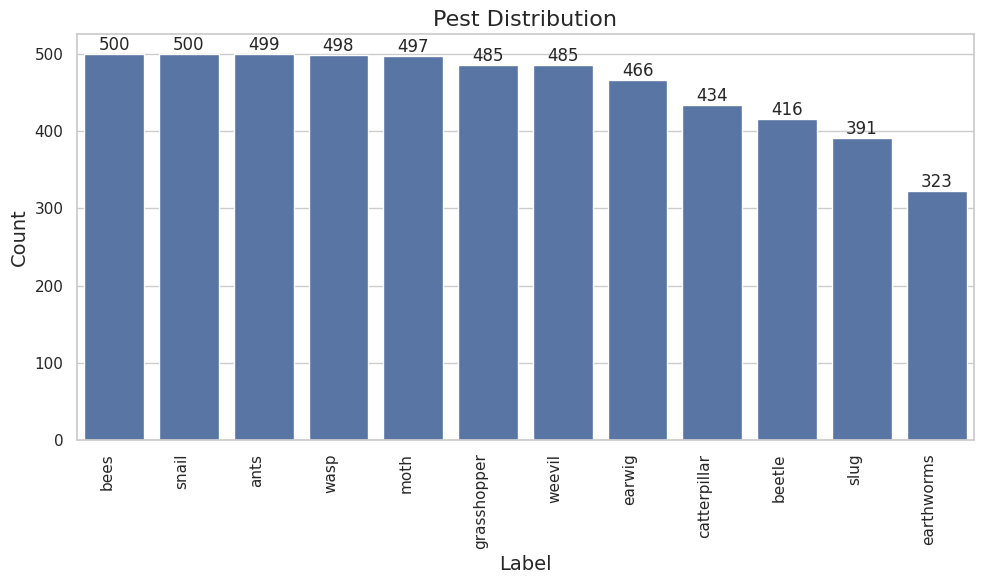

In [ ]:
import matplotlib.pyplot as plt  # Import Matplotlib for plotting
import seaborn as sns  # Import Seaborn for enhanced visualizations

# Plot the label distribution as a bar plot using Seaborn

# Let's check if the dataset is balanced or not (i.e., whether different pest categories have similar image counts)

plt.figure(figsize=(10, 6))  # Create a new figure with a specified size (10 inches wide, 6 inches tall)
sns.set(style='whitegrid')  # Set the Seaborn style to 'whitegrid' for better readability

# Generate the bar plot using Seaborn
ax = sns.barplot(
    x=df['label'].value_counts().index,  # Pest category names (x-axis)
    y=df['label'].value_counts().values  # Corresponding count of images in each category (y-axis)
)

for p in ax.containers:
    ax.bar_label(p)

# Customize the plot appearance
plt.xlabel('Label', fontsize=14)  # Set the x-axis label with font size 14
plt.ylabel('Count', fontsize=14)  # Set the y-axis label with font size 14
plt.title('Pest Distribution', fontsize=16)  # Add a title to the plot with font size 16
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels by 45 degrees for better readability

plt.tight_layout()  # Adjust layout to prevent label overlap

# Show the plot
plt.show()  # Display the bar plot


The Data Imbance is not serious and the dataset usable in its current state

# Interpretation of the Pest Distribution Plot

**1. Dataset Balance:**

- The dataset appears partially balanced, with some pest categories having nearly equal image counts (e.g., bees, snails, ants, wasps, moths, grasshoppers all have around 500 images).

- However, there is a noticeable imbalance towards the lower end, with earthworms (323 images) having significantly fewer samples than others.

**2. Most Represented Categories:**

- Bees, snails, ants, wasps, moths, and grasshoppers are the most represented, all close to 500 images.

**3. Least Represented Categories:**

- Earthworms (323 images), slugs (391 images), beetles (416 images), and caterpillars (434 images) are the least represented groups.

- The large difference in sample sizes might affect model performance, as some categories may be underrepresented, leading to biased predictions.

**4. Potential Issues:**

- If this dataset is used for classification, underrepresented classes may suffer from lower accuracy because the model might be biased towards the overrepresented categories.

- Techniques like data augmentation or resampling may be needed to balance the dataset.

**Recommendations:**
- ✅ As this dataset is for machine learning, consider applying:

- Oversampling (e.g., SMOTE) to increase data for minority classes.

- Undersampling to reduce overrepresented classes.

- Data augmentation (flipping, rotating, brightness adjustments, etc.) for balance.

TRAINING CNN MODEL FROM SCRATCH

In [ ]:
# Split the data into training, validation, and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)


In [ ]:
# Define a data generator for preprocessing and augmenting training images
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to the range [0, 1]
    rotation_range=20,  # Randomly rotate the images by up to 20 degrees for data augmentation
    width_shift_range=0.2,  # Randomly shift the image horizontally by up to 20% of its width
    height_shift_range=0.2,  # Randomly shift the image vertically by up to 20% of its height
    shear_range=0.2,  # Apply shear transformation to the images
    zoom_range=0.2,  # Randomly zoom in/out on the images by up to 20%
    horizontal_flip=True,  # Randomly flip images horizontally (left to right)
    fill_mode='nearest'  # Strategy to fill in newly created pixels after transformations
)

batch_size = 32  # Number of images to process in each batch during training
image_size = (224, 224)  # Desired size for input images (adjust as needed)


In [ ]:
# Create a data generator for training images using a DataFrame
# 'train_df' contains information about image paths and their corresponding labels

train_generator = datagen.flow_from_dataframe(
    train_df,  # DataFrame containing image paths and labels
    x_col='image_path',  # Column name for image file paths
    y_col='label',  # Column name for image labels
    target_size=image_size,  # Resize images to the target size
    batch_size=batch_size,  # Use the defined batch size
    class_mode='categorical',  # Specify the type of classification task (categorical for multi-class)
    shuffle=True  # Shuffle the data randomly during training
)

# Create a data generator for validation images using a DataFrame
# 'val_df' contains information about image paths and their corresponding labels

val_generator = datagen.flow_from_dataframe(
    val_df,  # DataFrame containing image paths and labels
    x_col='image_path',  # Column name for image file paths
    y_col='label',  # Column name for image labels
    target_size=image_size,  # Resize images to the target size
    batch_size=batch_size,  # Use the defined batch size
    class_mode='categorical',  # Specify the type of classification task (categorical for multi-class)
    shuffle=False  # Do not shuffle the data during validation
)


# Create a data generator for test images using a DataFrame
# 'test_df' contains information about image paths and their corresponding labels

test_generator = datagen.flow_from_dataframe(
    test_df,  # DataFrame containing image paths and labels
    x_col='image_path',  # Column name for image file paths
    y_col='label',  # Column name for image labels
    target_size=image_size,  # Resize images to the target size
    batch_size=batch_size,  # Use the defined batch size
    class_mode='categorical',  # Specify the type of classification task (categorical for multi-class)
    shuffle=False  # Do not shuffle the data during testing
)

Found 3516 validated image filenames belonging to 12 classes.
Found 879 validated image filenames belonging to 12 classes.
Found 1099 validated image filenames belonging to 12 classes.


In [ ]:
# Define and compile your CNN model
model = models.Sequential([
    # First Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)),  # 64 filters, 3x3 kernel, ReLU activation
    layers.MaxPool2D(4, 4),  # Max pooling to reduce feature map size

    # Second Convolutional Block
    layers.Conv2D(256, (3, 3), activation='relu'),  # 256 filters for more complex features
    layers.MaxPool2D(2, 2),  # Pooling reduces dimensionality
    layers.Dropout(rate=0.3),  # 30% dropout to prevent overfitting

    # Third Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),  # Reintroducing 64 filters
    layers.MaxPool2D(4, 4),  # Pooling for further size reduction
    layers.Dropout(rate=0.3),  # Another dropout layer

    # Fourth Convolutional Block
    layers.Conv2D(512, (3, 3), activation='relu'),  # 512 filters for deeper feature extraction
    layers.MaxPool2D(2, 2),  # Pooling to reduce dimensions
    layers.Dropout(rate=0.3),  # Prevents overfitting

    # Flatten the feature maps
    layers.Flatten(),  # Converts 2D feature maps into a 1D vector

    # Fully Connected (Dense) Layers
    layers.Dense(256, activation='relu'),  # Fully connected layer with 256 neurons
    layers.Dense(128, activation='relu'),  # Second dense layer with 128 neurons
    layers.Dropout(rate=0.3),  # Dropout for regularization

    layers.Dense(64, activation='relu'),  # Further feature refinement with 64 neurons
    layers.Dense(32, activation='relu'),  # Reducing complexity with 32 neurons
    layers.Dropout(rate=0.3),  # Another dropout layer

     # Output Layer
    layers.Dense(12, activation='softmax')  # 12 classes (one for each pest), softmax for multi-class classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
##I NEED TO INCOPERATE EARLY STOP FOR THIS TRAINING PROCESS

# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 5 epochs
early_stopping = EarlyStopping(monitor="val_loss",  # watch the validation loss metric
                               patience=5,         # stop training if no improvement for 5 epochs
                               restore_best_weights=True)  # restore best weights based on validation loss

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

epochs = 100  # Adjust the number of training epochs as needed

# Train the model using the training generator and validate using the validation generator
history = model.fit(
    train_generator,  # Training data generator
    steps_per_epoch=len(train_generator),  # Number of steps per training epoch
    epochs=epochs,  # Number of training epochs
    callbacks=[early_stopping],  # Specify callbacks, such as early stopping
    validation_data=val_generator,  # Validation data generator
    validation_steps=len(val_generator)  # Number of steps per validation epoch
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test accuracy: {test_accuracy}")

Epoch 1/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 498s 4s/step - accuracy: 0.1280 - loss: 2.4610 - val_accuracy: 0.1183 - val_loss: 2.4672
Epoch 2/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 491s 4s/step - accuracy: 0.1122 - loss: 2.4577 - val_accuracy: 0.1263 - val_loss: 2.4414
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 478s 4s/step - accuracy: 0.1194 - loss: 2.4552 - val_accuracy: 0.1263 - val_loss: 2.4566
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 474s 4s/step - accuracy: 0.1402 - loss: 2.4448 - val_accuracy: 0.1433 - val_loss: 2.3908
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 469s 4s/step - accuracy: 0.1274 - loss: 2.4222 - val_accuracy: 0.1422 - val_loss: 2.3650
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 472s 4s/step - accuracy: 0.1423 - loss: 2.3859 - val_accuracy: 0.1524 - val_loss: 2.3174
Epoch 7/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 498s 4s/step - accuracy: 0.1609 - loss: 2.3420 - val_accuracy: 0.1547 - val_loss: 2.3026
Epoch 8/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 504s 4s/step - accuracy: 0.1630 - loss: 2.3013 - 

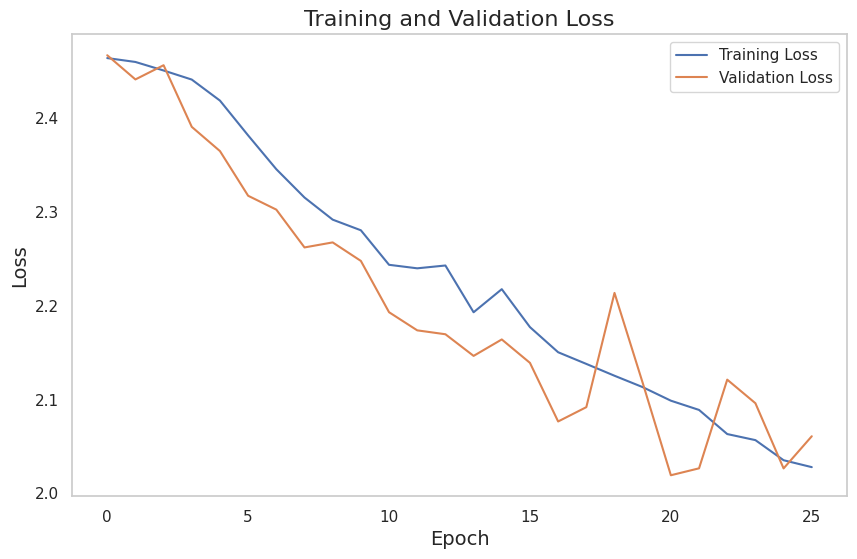

In [ ]:
# Plot training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Training and Validation Loss', fontsize=16)
plt.legend()
plt.grid()
plt.show()

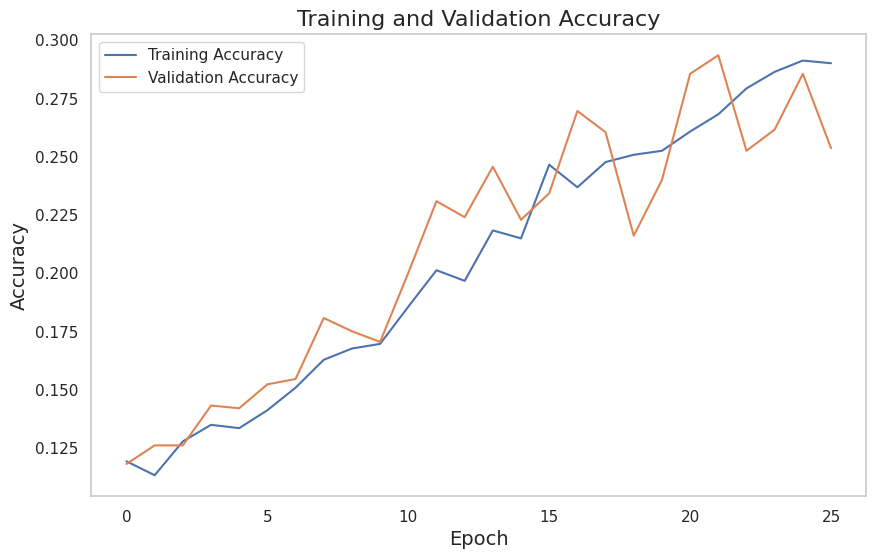

In [ ]:
# Plot training and validation accuracy over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Training and Validation Accuracy', fontsize=16)
plt.legend()
plt.grid()
plt.show()

# The performance of the model is too poor.
- Hence, I'm increasing 'patience=5' to patience=10
- Also increase 'epochs = 100' to epochs = 150

In [ ]:
##I NEED TO INCOPERATE EARLY STOP FOR THIS TRAINING PROCESS

# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 5 epochs
early_stopping = EarlyStopping(monitor="val_loss",  # watch the validation loss metric
                               patience=10,         # stop training if no improvement for 5 epochs
                               restore_best_weights=True)  # restore best weights based on validation loss

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

epochs = 150  # Adjust the number of training epochs as needed

# Train the model using the training generator and validate using the validation generator
history = model.fit(
    train_generator,  # Training data generator
    steps_per_epoch=len(train_generator),  # Number of steps per training epoch
    epochs=epochs,  # Number of training epochs
    callbacks=[early_stopping],  # Specify callbacks, such as early stopping
    validation_data=val_generator,  # Validation data generator
    validation_steps=len(val_generator)  # Number of steps per validation epoch
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test accuracy: {test_accuracy}")

FNETUNING RESNET MODEL

In [ ]:
# Separate the DataFrame 'df' into training and test sets with a 80-20 split.
train_df, test_df = train_test_split(df, test_size=0.2, shuffle=True, random_state=42)

# Create an ImageDataGenerator for training data with EfficientNetV2 preprocessing and a validation split.
train_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet_v2.preprocess_input,
    validation_split=0.2
)

# Create an ImageDataGenerator for test data with EfficientNetV2 preprocessing.
test_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet_v2.preprocess_input
)

# Create a data generator for training images using the training DataFrame.
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='image_path',                # Column containing image file paths
    y_col='label',                     # Column containing image labels
    target_size=(224, 224),            # Resize images to 224x224 pixels
    color_mode='rgb',                  # Use RGB color mode
    class_mode='categorical',          # Use categorical labels (for multiclass classification)
    batch_size=32,                     # Batch size for training data
    shuffle=True,                      # Shuffle the data
    seed=42,                           # Set a random seed for reproducibility
    subset='training'                  # Use the training subset of the data
)

# Create a data generator for validation images using the training DataFrame.
val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='image_path',
    y_col='label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'               # Use the validation subset of the data
)

# Create a data generator for test images using the test DataFrame.
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='image_path',
    y_col='label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False                      # Do not shuffle the test data
)


Found 3516 validated image filenames belonging to 12 classes.
Found 879 validated image filenames belonging to 12 classes.
Found 1099 validated image filenames belonging to 12 classes.


In [ ]:
##DATA AUGMENTAION

# Data Augmentation Step
augment = Sequential([
    RandomFlip("horizontal"),            # Random horizontal flipping
    RandomRotation(factor=0.2),          # Random rotation up to 20 degrees
    RandomZoom(height_factor=0.1, width_factor=0.1),  # Random zooming up to 10%
    RandomContrast(factor=0.1),          # Random contrast adjustment up to 10%
])

In [ ]:
# Import the ResNet50 model from tensorflow.keras.applications
from tensorflow.keras.applications import ResNet50

# Create a ResNet50 model with specific configurations:
resnet_model = ResNet50(
    include_top=False,                  # Exclude the top (output) layer
    weights='imagenet',                 # Initialize with pre-trained ImageNet weights
    input_shape=(224, 224, 3),          # Input shape of (224, 224, 3) for RGB images
    pooling='max'                       # Use max pooling as the final pooling layer
)

# Set the model to be non-trainable (freeze the weights)
resnet_model.trainable = False

# Define a checkpoint callback to save the best model during training
checkpoint_path = "pests_cats_classification_model_checkpoint.weights.h5"  # Path to save the checkpoint
checkpoint_callback = ModelCheckpoint(
    checkpoint_path,                   # File path for saving the checkpoint
    save_weights_only=True,            # Save only the model weights
    monitor="val_accuracy",            # Monitor validation accuracy
    save_best_only=True                # Save only the best model based on validation accuracy
)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout

##Model Setop
# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 5 epochs
early_stopping = EarlyStopping(monitor="val_loss",  # watch the validation loss metric
                               patience=5,         # stop training if no improvement for 5 epochs
                               restore_best_weights=True)  # restore best weights based on validation loss

# Add additional layers for the custom head of the model
# Define the input layer using the ResNet50 model's input
inputs = resnet_model.input

# Apply data augmentation to the input images
x = augment(inputs)

# Apply random horizontal flips to the images
x = tf.keras.layers.RandomFlip("horizontal")(x)
# Apply random rotations with a maximum angle of 0.2 radians
x = tf.keras.layers.RandomRotation(0.2)(x)

# Pass the preprocessed and augmented input through the ResNet50 base model
x = resnet_model(x)

# Add a fully connected layer with 128 units and ReLU activation
x = Dense(128, activation='relu')(x)

# Apply dropout with a rate of 0.45 to prevent overfitting
x = Dropout(0.45)(x)

# Add another fully connected layer with 256 units and ReLU activation
x = Dense(256, activation='relu')(x)

# Apply dropout again with a rate of 0.45
x = Dropout(0.45)(x)

# Define the output layer with 12 units (for 12 classes) and softmax activation for classification
outputs = Dense(12, activation='softmax')(x)

# Define the final model
model = Model(inputs=inputs, outputs=outputs)

In [ ]:
#MODELLING
# Create the final model
# Create the final model by specifying the input and output layers
model = Model(inputs=inputs, outputs=outputs)

# Compile the model with specific configurations:
model.compile(
    optimizer=Adam(0.0001),               # Use the Adam optimizer with a learning rate of 0.0001
    loss='categorical_crossentropy',      # Use categorical cross-entropy loss for multi-class classification
    metrics=['accuracy']                 # Track accuracy as a metric during training
)

# Train the model using the training and validation data
history = model.fit(
    train_images,                         # Training data generator
    steps_per_epoch=len(train_images),    # Number of steps (batches) per training epoch
    validation_data=val_images,           # Validation data generator
    validation_steps=len(val_images),    # Number of steps (batches) per validation epoch
    epochs=100,                           # Number of training epochs
    callbacks=[
        early_stopping,                   # Early stopping callback for preventing overfitting
        checkpoint_callback               # Model checkpoint callback to save the best model
    ]
)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


110/110 ━━━━━━━━━━━━━━━━━━━━ 37s 207ms/step - accuracy: 0.0948 - loss: 6.3165 - val_accuracy: 0.2071 - val_loss: 2.3639
Epoch 2/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 32s 169ms/step - accuracy: 0.1495 - loss: 2.4931 - val_accuracy: 0.2742 - val_loss: 2.2812
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 19s 171ms/step - accuracy: 0.1742 - loss: 2.4244 - val_accuracy: 0.2981 - val_loss: 2.2129
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 21s 175ms/step - accuracy: 0.2181 - loss: 2.3461 - val_accuracy: 0.3879 - val_loss: 2.0126
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 21s 191ms/step - accuracy: 0.2699 - loss: 2.2136 - val_accuracy: 0.4152 - val_loss: 1.8698
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 39s 176ms/step - accuracy: 0.3138 - loss: 2.1177 - val_accuracy: 0.4619 - val_loss: 1.7564
Epoch 7/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 21s 179ms/step - accuracy: 0.3395 - loss: 2.0394 - val_accuracy: 0.5028 - val_loss: 1.6150
Epoch 8/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 19s 171ms/step - accuracy: 0.3636 - loss: 1.956

# Interpretation of the Training Output
**1. Warning Message:**

- The message at the beginning (UserWarning) suggests that the PyDataset class should call super().__init__(**kwargs). This is a warning, not an error, meaning the training still proceeds but may have issues with multiprocessing or queueing.

**2. Training Progress:**

- Epochs: The model is trained for multiple epochs (up to 55 in the output shown).

- Accuracy:

  - Starts very low at 9.48% in epoch 1.

  - Improves steadily and reaches 65.65% by epoch 36.

- Loss:

- Initially very high (6.3165) and decreases gradually.

- By epoch 36, it drops significantly to 1.1188.

**3. Validation Metrics:**

- Validation Accuracy:

  - Starts at 20.71% (epoch 1).

  - Improves to 77.70% (epoch 36).

- Validation Loss:

  - Starts at 2.3639 and decreases to 0.7771, indicating the model is learning well.

**4. Observations:**

- The model is improving with training, as seen from decreasing loss and increasing accuracy.

- Validation accuracy is rising, meaning generalization to unseen data is improving.

- There is no severe overfitting yet since validation accuracy is increasing alongside training accuracy.

**Next Steps:**

- Monitor for overfitting in later epochs.

- Consider early stopping if validation accuracy plateaus or starts to drop.

- Tune hyperparameters (e.g., learning rate, batch size) for better performance.

In [ ]:
# Compile the model before evaluation
model.compile(
    optimizer=tf.keras.optimizers.Adam(),   # Use Adam optimizer
    loss="categorical_crossentropy",        # Use categorical cross-entropy for multi-class classification
    metrics=["accuracy"]                    # Track accuracy during training/evaluation
)

# Now, evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, steps=len(test_images))

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 139ms/step - accuracy: 0.8260 - loss: 0.6556
Test Loss: 0.6013882160186768
Test Accuracy: 0.8325750827789307


# Interpretation of the Output
**1. Model Compilation**

- The model is compiled using the Adam optimizer, which is well-suited for deep learning models because it adapts the learning rate dynamically.

- The loss function is categorical cross-entropy, which is appropriate for multi-class classification problems.

- Accuracy is used as the evaluation metric to measure how well the model is classifying test samples.

**2. Model Evaluation on the Test Set**

- The model is evaluated on the test dataset (test_images).

- The evaluation process runs for 35 steps, meaning the test dataset is processed in 35 batches.

- The total evaluation time is 9 seconds, with an average of 139ms per step.

**3. Performance Metrics from the Output**

- Accuracy: 0.8326 (~83.26%)

  - This means that the model correctly classifies approximately 83.26% of the test samples.

  - This is a good accuracy, indicating that the model performs well on unseen data.

- Loss: 0.6014

  - This is the categorical cross-entropy loss. A lower loss indicates better model performance.

  - Since the loss has decreased from 0.6556 (during evaluation steps) to 0.6014 (final output), it suggests the model is improving slightly as more batches are processed.

**Key Takeaways**
- The model has a decent accuracy of 83.26%, meaning it classifies most test samples correctly.

- The loss value (0.6014) indicates some room for improvement, possibly through hyperparameter tuning, data augmentation, or a deeper model.

- If a higher accuracy is needed, strategies such as regularization, additional training data, or fine-tuning hyperparameters might be helpful.

In [ ]:
print(history.history.keys())  # Check available keys (should include 'loss' and 'val_loss')

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


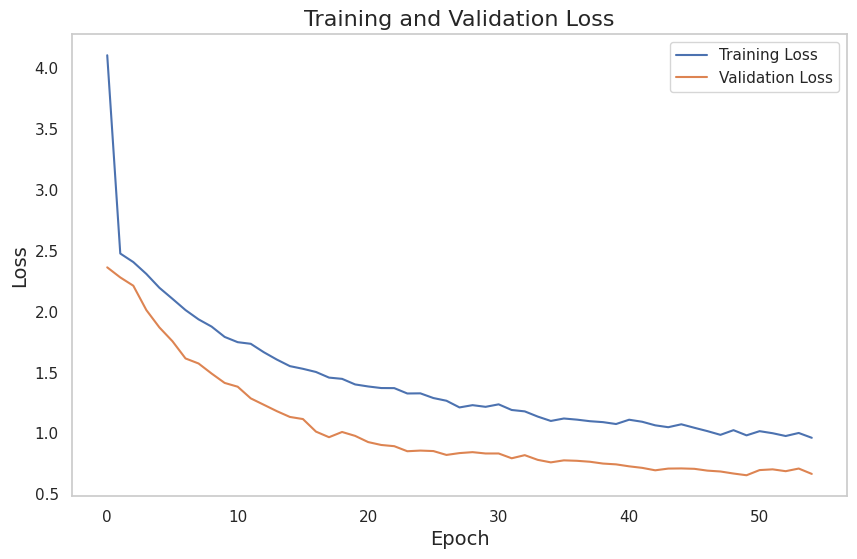

In [ ]:
# Plot training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Training and Validation Loss', fontsize=16)
plt.legend()
plt.grid()
plt.show()

# Key Observations & Insights
**1. Training vs. Validation Loss Gap**

- The training loss is consistently higher than validation loss due to dropout and data augmentation.

- Dropout randomly deactivates neurons during training, making it harder for the model to memorize data.

- Data augmentation introduces variations in the input images, forcing the model to generalize rather than overfit.

**2. Stable Validation Loss**

- The validation loss follows a smooth downward trend without sharp increases, indicating that the model is not overfitting despite dropout.

- This suggests that the model is learning meaningful patterns rather than memorizing training data.

**Final Performance**

- Since the validation loss does not increase at later epochs, the model has not yet started overfitting.

- If training continues and validation loss starts increasing while training loss continues decreasing, that would signal overfitting.

**Recommendations & Next Steps**
- ✅ Monitor Accuracy – Check if validation accuracy aligns with this trend. A growing accuracy gap could indicate underfitting.
- ✅ Fine-tune Dropout Rate – If training loss remains too high, reducing dropout slightly (e.g., from 0.5 to 0.3) could improve performance.
- ✅ Early Stopping – If the loss stabilizes, consider stopping training to avoid unnecessary computation.

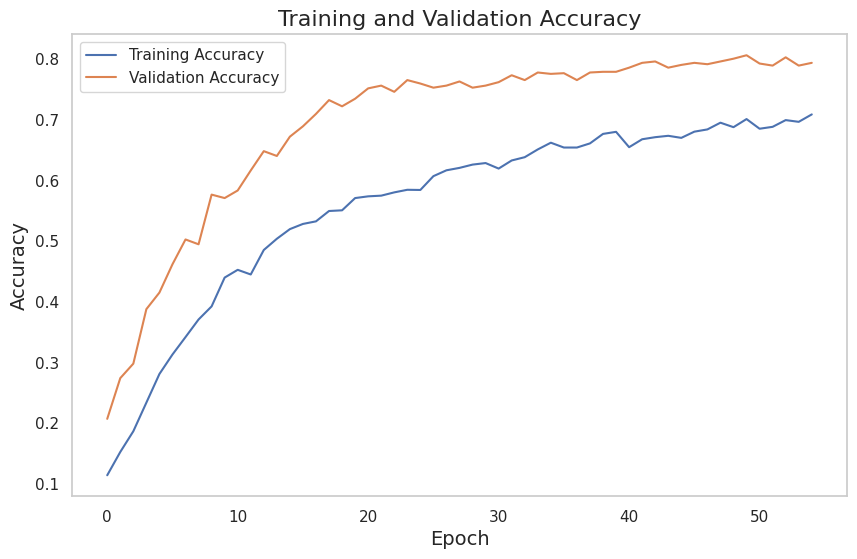

In [ ]:
# Plot training and validation accuracy over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Training and Validation Accuracy', fontsize=16)
plt.legend()
plt.grid()
plt.show()

# Interpretation of Training and Validation Accuracy Plot
**Key Observations**

**1. Validation Accuracy > Training Accuracy**

- The validation accuracy is consistently higher than the training accuracy.

- This is unusual in standard training but makes sense given the use of dropout and data augmentation:

  - Dropout forces the network to generalize by randomly deactivating neurons, making training harder.

  - Data augmentation creates variability in training data, making it more challenging than validation data.

**2. Upward Trend Without Overfitting**

- Both training and validation accuracy are increasing over epochs, with validation accuracy stabilizing around 80%.

- The absence of a sharp decline in validation accuracy suggests the model is generalizing well.

**3. Gap Between Training and Validation Accuracy**

- A persistent gap exists between validation and training accuracy, meaning:

  - The model is performing better on validation data, likely due to dropout making training artificially harder.

  - The training accuracy might catch up with more fine-tuning (e.g., adjusting dropout rate or learning rate).

**Recommendations & Next Steps**
- ✅ Reduce Dropout Slightly (e.g., from 0.5 to 0.3) if the training accuracy remains much lower.
- ✅ Check Augmented vs. Non-Augmented Performance – Compare performance on real validation data without augmentation.
- ✅ Fine-tune Learning Rate – A small reduction in learning rate can improve training accuracy while keeping generalization intact.
- ✅ Consider Batch Normalization – It might help stabilize learning and close the accuracy gap.

**SELECTION: SAVING THE BEST PERFORMING MODEL**

In [ ]:
#selecting the beter performing model --> Resnet Fnetuned
model.save("resnet_finetuned.h5")
import os

label_list = os.listdir("/content/drive/MyDrive/Datasets/agricultural-pests-image-dataset")

NameError: name 'model' is not defined

In [ ]:
model = keras.models.load_model("resnet_finetuned.h5")

In [ ]:
label_list = os.listdir("/content/agricultural-pests-image-datasets")


In [ ]:
label_list

['earwig',
 'beetle',
 'slug',
 'weevil',
 'grasshopper',
 'wasp',
 'bees',
 'snail',
 'moth',
 'ants',
 'earthworms',
 'catterpillar']

In [ ]:
# import model
model = keras.models.load_model("resnet_finetuned.h5")

import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the pre-trained model
def load_and_infer_image(image_path, loaded_model = model):
    # Load the Keras model
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))  # Adjust the target size as needed
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = tf.keras.applications.resnet50.preprocess_input(img)  # Preprocess for ResNet-50; adjust for your model

    # Perform inference
    predictions = loaded_model.predict(img)

    # You may want to decode the predictions based on your specific use case
    # For example, for ImageNet classification, you can use:
    # from tensorflow.keras.applications.imagenet_utils import decode_predictions
    # decoded_predictions = decode_predictions(predictions, top=5)[0]

    return predictions



FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'resnet_finetuned.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
load_and_infer_image()  # Replace with the image file path you want to infer

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-39-0a30a8c97df0>, line 1)

In [ ]:
image_path = r"C:\Users\USER\Desktop\AMDARI 2024 to 25\Data Sc projects\Precision Pest Control Via Object Detection 25th Mar 25\grasshopper\image.jpg"
predictions = load_and_infer_image(image_path)


NameError: name 'load_and_infer_image' is not defined

In [ ]:
#try with grasshoppers(10), snail, bees and ants

In [ ]:
# Example usage:
image_path = 'C:\Users\USER\Desktop\AMDARI 2024 to 25\Data Sc projects\Precision Pest Control Via Object Detection 25th Mar 25.jpg'  # Replace with the image file path you want to infer
predictions = load_and_infer_image( image_path)

# Print the inference results
print(predictions.argmax())


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-32-2beb24d667f8>, line 2)

In [ ]:
pred = predictions.argmax()

In [ ]:
label_list[pred]

'grasshopper'